#Pytorch Workflow
Pytorch end-to-end workflow

https://www.learnpytorch.io/01_pytorch_workflow/

In [75]:
steps = {1: "Data (prepare and load)",
         2: "Build model",
         3: "Fitting the model to data (training)",
         4: "Making predictions and evaluating the model",
         5: "Saving and loading the model"}
steps #Dictionary

{1: 'Data (prepare and load)',
 2: 'Build model',
 3: 'Fitting the model to data (training)',
 4: 'Making predictions and evaluating the model',
 5: 'Saving and loading the model'}

In [76]:
import torch
from torch import nn #nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

##1. Data(preparing and loading)

Data can be almost anything in machine learning
* Excel spreadsheets
* Audio
* DNA
* Text
* Videos
* Images

1. Get data into numerical representation
2. Build a model to learn patterns in that numerical representation

Create some known data using linear regression formula (y = mx + c).
Make a straight line using known **parameters**

In [77]:
#Create known parameters
weight = 0.7 # m (Gradient/ Slope of the line)
bias = 0.3 # c (y intercept)

#Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1) #Adds an extra dimension
y = weight * X + bias # y = mX + c

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [78]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets, Most important concept in ML

In [79]:
#Creating a train test split
train_split = int(0.8 * len(X))
#print(f"The number of samples for training are {train_split}")
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"The number of samples for training are {len(X_train)}, {len(y_train)} and the number of samples for testing are {len(X_test)}, {len(y_test)}")

The number of samples for training are 40, 40 and the number of samples for testing are 10, 10


### Visualising data

In [80]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """Plots training data, testing data and compares predictions"""
  plt.figure(figsize = (10, 7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", s = 8,marker = 'o', label = "Training data")

  #Plot testing data in green
  plt.scatter(test_data, test_labels, c = "g", s = 8, marker = "o", label = "Testing data")

  #Are there predictions
  if predictions is not None:
    #Plot the predcitions
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")

  plt.legend(prop = {"size" : 14})

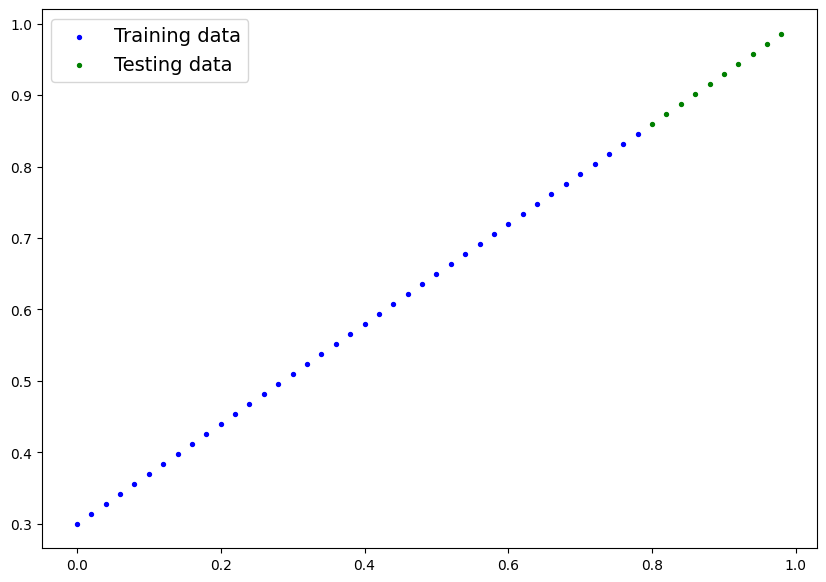

In [81]:
plot_predictions()

## Building our first pytorch model

for classes review: https://realpython.com/python-classes/

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to get closer to (better represent) the ideal values (weight and bias values we used to create the data)

Algorithms used:
1. Gradient descent
2. Back Propagation

In [82]:
#Create linear regression model class
import torch
from torch import nn
class LinearRegressionModel(nn.Module): #Almost everything in pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,  #Start with a random value
                                            requires_grad = True, #Keeps track of our gradient parameter and updates it through gradient descent and backpropagation
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))
  #Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: # x is the input tensor, "->" indicates the return type of the function
    return self.weights * x + self.bias #Linear regression formula y = mx + c
  #Any subclass of nn.Module needs to override the forward method (Defines forward computation of the model)


###Pytorch model building essentials

* torch.nn - contains all the building blocks for computational graphs(neural networks)
* torch.nn.Parameter - What parameters should our model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.Module - Base class for all Neural network modules, if you subclass it, you need to override the forward() method
* torch.optim - This is where the optimizers in pytorch live, they help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward

Cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our pytorch model

Check model parameters or whats inside the model by using `.parameters()`

In [83]:
#Creating a random seed for random values
torch.manual_seed(42)
#Creating an instance of the model

model_0 = LinearRegressionModel()
#Checking out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [84]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [85]:
weight, bias
#OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
# We need these values to get as close as possible to
# (0.7, 0.3)

(0.7, 0.3)

###Making predictions using torch.inference_model()

To check models predictive powers, lets see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the forward() method

In [86]:
print(f"{X_test} \n\n {y_test}")  #What a perfect model would predict

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]]) 

 tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In [87]:
with torch.inference_mode(): #Makes predictions faster
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

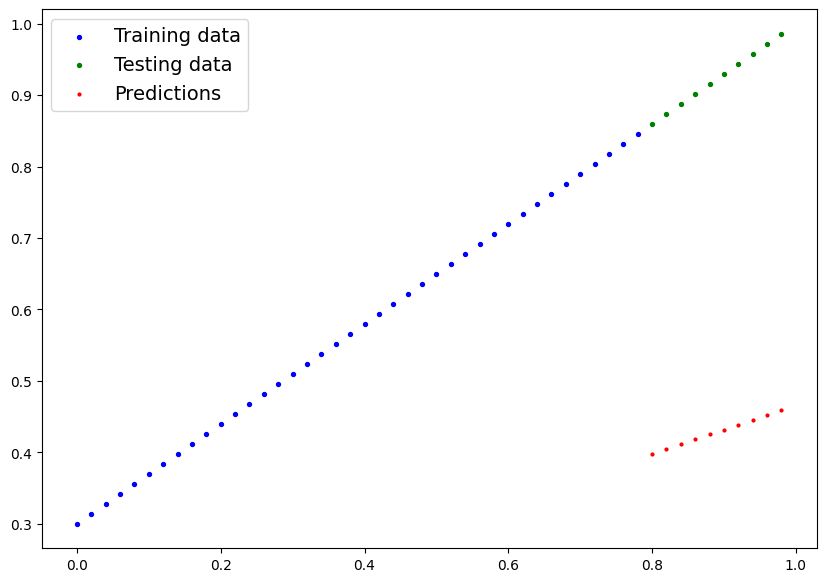

In [88]:
plot_predictions(predictions = y_preds)

## 3. Train Model
Whole idea of training is to move from some *unknown* parameters (these may be random) to some *known* parameters.

From a poor representation of data to a better representation of data

One way to measure how wrong the predictions are, we use a loss function(cost function / criterion)

Things we need to train:

* **Loss Function:** A function to measure how wrong your models predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (weight and bias in this case) to improve the loss function

Specifically for pytorch we need:
* training loop
* testing loop


In [89]:
#Check out models parameters (A parameter is a value the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [90]:
#Setting up a loss function
loss_fn = nn.L1Loss() # We need to minimize the distance between the predictions points and the actual value of testing points in the above graph
#L1Loss is just Mean Absolute Error(Distance between the points)

#Setting up an optimizer (Stochastic Gradient descent)
#Starts by randomly adjusting values, when it sees that loss is decreasing by its change, it keeps changing in that direction till loss does not decrease anymore
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)
#params means which parameters should the optimizer optimize?
#lr = learning rate, the most important hyperparameter (We set it)
#Higher the learning rate, the more it adjusts each of the parameters in one run
#e.g with lr 0.01 the weight 0.3367 will be changed by 0.01 in one run

QS: Which loss function or optimizer should be used?

Ans: It will be problem specific, with experience learn what works best with the particular problem set

For example for our linear regression problem nn.L1Loss() and torch.optim.SGD will suffice

but for a problem like classification e.g cats or dogs a binary cross entropy function may work best nn.BCELoss()

### Building a training loop and a testing loop

What we need:
0. Loop through the data
1. Forward pass (This involves the data moving through our models `forward()` functions) to make predictions on the data
2. Calculate the loss (Compare the forward pass predictions to the actual true values)
3. Optimizer zero grad
4. Loss Backwards - move backwards through the neural network to calculate the gradients of each of the parameters of our model with respect to the loss (**Back Propagation**)
5. Optimizer Step - Use the optimizer to adjust our models parameters in order to try and improve the loss (**Gradient Descent**)


In [91]:
torch.manual_seed(42)
#An epoch is one loop through the data.(HyperParameter)
epochs = 200
#Track different values for monitoring and comparisons

epoch_count = []
train_loss_values = []
test_loss_values = []

#Refer to where model_0 was created for better understanding
#Training
#0. Loop through the data
for epoch in range(epochs):
  #Set the model to training mode
  model_0.train() #Train mode in pytorch sets all parameters that require gradients to require gradients
  #1. Forward pass
  y_pred = model_0(X_train) #Trained on the basis of X_train data points so we are predicting the y value for the X_train values

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train) #Usnay predict kya kiya aur actual kya tha, y_pred is what the model predicted and y_train is the actual value
  #print(f"Loss: {loss}")

  #3. Optimizer zero grad, Zero the gradients of the optimizer(They accumulate by default in each epoch)
  optimizer.zero_grad()

  #4. Perform back propagation on the loss function wrt the parameters (compute the gradient of every parameter with requires_grad = True)
  loss.backward()

  #5. Step the optimizer to update the model's parameters wrt the gradients calculated by loss.backward() (Perform Gradient Descent)
  optimizer.step()
  #By default how the optimizer changes will accumulate through the loop so we have to zero them above in step 3

  #Testing
  model_0.eval() # Put the model into evaluation mode, turns off different settings not required for evaluation/testing
  with torch.inference_mode(): #Turns off gradient tracking and a more things not needed for testing (Faster performance)
    #1. Perform the forward pass
    test_pred = model_0(X_test) #Testing so use testing data throughout, Not training data.

    #2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test) #What our model predicted for test data and what the actual test values were (How wrong our model is on the testing data)

  #Print out what is happening every 10 epochs
  if epoch % 10 == 0: #In order to now clutter and just get results after 10 epochs
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"\n Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss} \n")

    #Print out model state_dict
    print(model_0.state_dict()) #Optimal value for weight is 0.7 and bias is 0.3


 Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495 

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

 Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428 

OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])

 Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688 

OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])

 Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703 

OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])

 Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106 

OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])

 Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024 

OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])

 Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135 

OrderedDict([('weights', tensor([0.5116

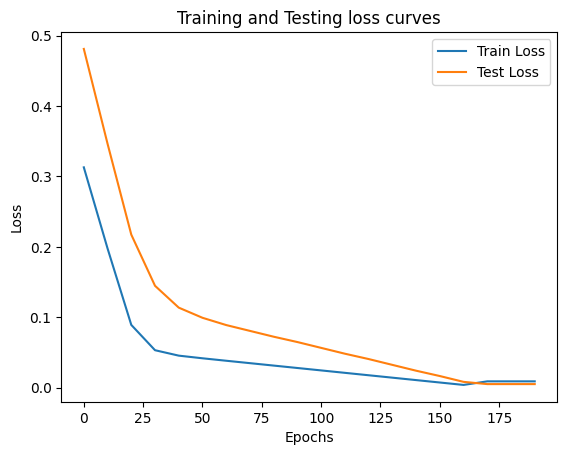

In [92]:
#Plotting the loss curves
import numpy as np #need to convert to numpy array as matplotlib works with numpy arrays, not tensors
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).cpu().numpy()), label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Training and Testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [93]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

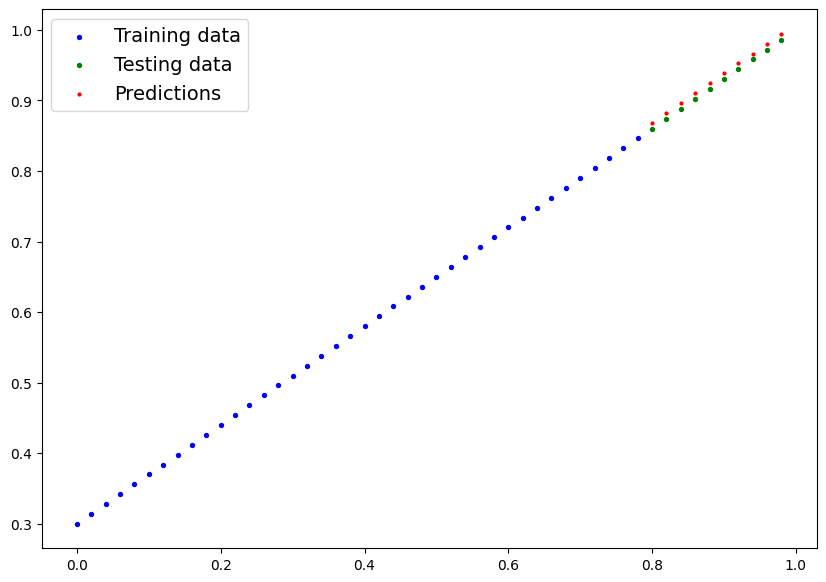

In [94]:
plot_predictions(predictions = y_preds_new)

##Saving a model in pytorch

Three Methods for saving and loading models
1. `torch.save()` - Allows you to save a Pytorch object in pythons pickle format
2. `torch.load()` - Allows you to load a Pytorch object
3. `torch.nn.Module.load_state_dict()` - Allows you to load a model's saved state dictionary

In [95]:
#Saving our pytorch model
from pathlib import Path

#1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#3. Saving the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

Saving model to models/01_pytorch_workflow_model_0.pth


In [96]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Jul  5 14:27 01_pytorch_workflow_model_0.pth


## Loading a pytorch model

Since we saved our model's `state_dict()` rather than our entire model, we'll create a new instance of our model class and load the saved `state_dict()` in it


In [97]:
#Instantiate a new instance of our model class to load in

loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict of model_0 (this will update the new instance with the updated parameters)
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


<All keys matched successfully>

In [98]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [99]:
# Making some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [100]:
#Checking if old predictions of model_0 match with the new predictions from the loaded model
y_preds_new == loaded_model_preds
#Output is True.

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##6. Putting it all together

Creating device agnostic code

In [101]:
import torch
from torch import nn

In [102]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")


Device: cuda


In [103]:
#Getting Data
weight = 0.7
bias = 0.3
data = torch.arange(start = 0, end = 1, step = 0.02).unsqueeze(dim = 1)
y = weight * data + bias
print(len(data), len(y))

50 50


In [104]:
train_set = int(0.8 * len(data))
X_train = data[:train_set]
y_train = y[:train_set]
X_test = data[train_set:]
y_test = y[train_set:]
print(len(X_train), len(y_train), len(X_test), len(y_test))

40 40 10 10


In [105]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.Linear() for creating the model's parameters
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1) #Input of size 1 and output of size 1

  def forward(self, x:torch.Tensor) -> torch.Tensor:
      return self.linear_layer(x)

In [106]:
torch.manual_seed(42)
model_1 = LinearRegression()
list(model_1.parameters()), model_1, model_1.state_dict()

([Parameter containing:
  tensor([[0.7645]], requires_grad=True),
  Parameter containing:
  tensor([0.8300], requires_grad=True)],
 LinearRegression(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [107]:
#Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [108]:
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                        lr = 0.01)

In [109]:
torch.manual_seed(42)
epochs = 200
epoch_count = []
train_loss_values = []
test_loss_values = []

#Put data on target device, device agnostic code for data
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train) #Forward pass
  train_loss = loss_func(y_pred, y_train) #Calc loss
  optimizer.zero_grad() #Zero the gradients
  train_loss.backward() #Perform back propagation
  optimizer.step() #Optimize the parameters

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_func(test_pred, y_test)

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"epoch: {epoch}, train loss = {train_loss}, test loss = {test_loss}")

epoch: 0, train loss = 0.5551779866218567, test loss = 0.5739762187004089
epoch: 10, train loss = 0.439968079328537, test loss = 0.4392664134502411
epoch: 20, train loss = 0.3247582018375397, test loss = 0.30455657839775085
epoch: 30, train loss = 0.20954833924770355, test loss = 0.16984669864177704
epoch: 40, train loss = 0.09433845430612564, test loss = 0.03513690456748009
epoch: 50, train loss = 0.023886388167738914, test loss = 0.04784907028079033
epoch: 60, train loss = 0.019956795498728752, test loss = 0.045803118497133255
epoch: 70, train loss = 0.016517987474799156, test loss = 0.037530567497015
epoch: 80, train loss = 0.013089174404740334, test loss = 0.02994490973651409
epoch: 90, train loss = 0.009653178043663502, test loss = 0.02167237363755703
epoch: 100, train loss = 0.006215683650225401, test loss = 0.014086711220443249
epoch: 110, train loss = 0.00278724217787385, test loss = 0.005814164876937866
epoch: 120, train loss = 0.0012645035749301314, test loss = 0.013801801018

In [110]:
print(model_1.state_dict())
weight,bias

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')), ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])


(0.7, 0.3)

In [111]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

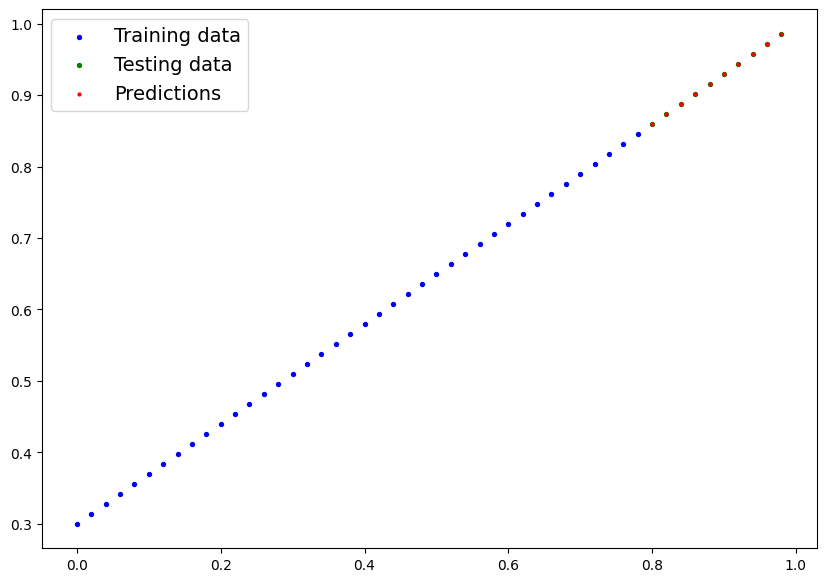

In [112]:
#Check out model predictions visually
plot_predictions(predictions = y_preds.cpu())
#Predictions on top of testing data!

In [113]:
#Saving our pytorch model
from pathlib import Path

#1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#3. Saving the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(), f = MODEL_SAVE_PATH)

Saving model to models/01_pytorch_workflow_model_1.pth


In [118]:
#Instantiate a new instance of our model class to load in

loaded_model_1 = LinearRegression()

#Load the saved state_dict of model_1 (this will update the new instance with the updated parameters)
loaded_model_1.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

#Put loaded model onto device
loaded_model_1.to(device)

LinearRegression(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [117]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

## FINISHED HERE, EXERCISES DONE IN SEPARATE NOTEBOOK